Elastic transformations


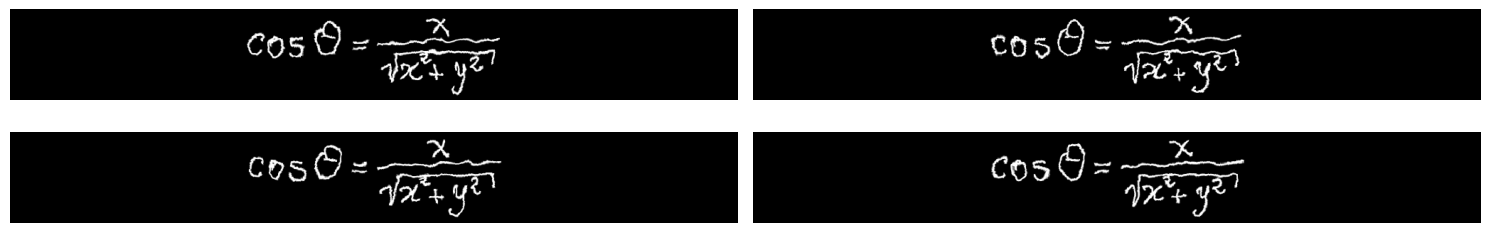

In [1]:
import albumentations as A
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

class RandomMorphology(A.ImageOnlyTransform):
    def __init__(self, p=0.5, kernel_size=2):
        super(RandomMorphology, self).__init__(p)
        self.kernel_size = kernel_size

    def apply(self, img, **params):
        op = random.choice(['erode', 'dilate'])
        kernel = np.ones((self.kernel_size, self.kernel_size), np.uint8)
        if op == 'erode':
            return cv2.erode(img, kernel, iterations=1)
        else:
            return cv2.dilate(img, kernel, iterations=1)

inp_h = 128
inp_w = 128 * 8

def process_img(filename):
    """
    Load, binarize, ensures background is black, resize and apply centered padding
    """

    image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    _, bin_img = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    white = np.sum(bin_img == 255)
    black = np.sum(bin_img == 0)
    if white > black:
        bin_img = 255 - bin_img

    h, w = bin_img.shape
    new_w = int((inp_h / h) * w)

    if new_w > inp_w:
        resized_img = cv2.resize(bin_img, (inp_w, inp_h), interpolation=cv2.INTER_AREA)
    else:
        resized_img = cv2.resize(bin_img, (new_w, inp_h), interpolation=cv2.INTER_AREA)
        padded_img = np.ones((inp_h, inp_w), dtype=np.uint8) * 0  # black background
        x_offset = (inp_w - new_w) // 2
        padded_img[:, x_offset:x_offset + new_w] = resized_img
        resized_img = padded_img

    return resized_img


original_image = process_img('../resources/CROHME/train/img/70_rosario.bmp')
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

num_visualizations = 4

transforms = A.Compose([
    A.ElasticTransform(alpha=100, sigma=7, p=1, interpolation=cv2.INTER_CUBIC),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    A.pytorch.ToTensorV2()
])


fig, axes = plt.subplots(2, 2, figsize=(15, 3))
axes = axes.flatten()

for i in range(num_visualizations):
    transformed = transforms(image=original_image)
    transformed_image = transformed['image'].permute(1, 2, 0).numpy()

    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    transformed_image = (transformed_image * std + mean).clip(0, 1)

    axes[i].imshow(transformed_image)
    axes[i].axis('off')

plt.tight_layout()
print('Elastic transformations')
plt.show()

Rotation


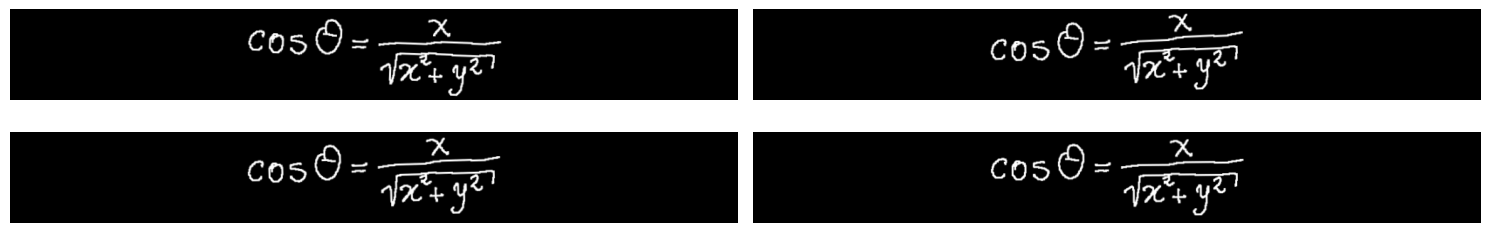

In [2]:
transforms = A.Compose([
    A.Rotate(limit=5, p=1, border_mode=cv2.BORDER_REPLICATE),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    A.pytorch.ToTensorV2()
])


fig, axes = plt.subplots(2, 2, figsize=(15, 3))
axes = axes.flatten()

for i in range(num_visualizations):
    transformed = transforms(image=original_image)
    transformed_image = transformed['image'].permute(1, 2, 0).numpy()

    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    transformed_image = (transformed_image * std + mean).clip(0, 1)

    axes[i].imshow(transformed_image)
    axes[i].axis('off')

plt.tight_layout()
print('Rotation')
plt.show()

Dilation / Erosion


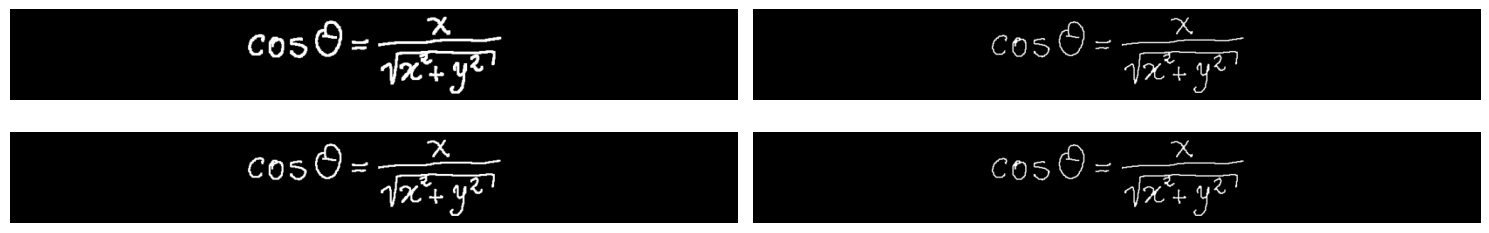

In [3]:
transforms = A.Compose([
    RandomMorphology(p=0.75, kernel_size=2),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    A.pytorch.ToTensorV2()
])


fig, axes = plt.subplots(2, 2, figsize=(15, 3))
axes = axes.flatten()

for i in range(num_visualizations):
    transformed = transforms(image=original_image)
    transformed_image = transformed['image'].permute(1, 2, 0).numpy()

    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    transformed_image = (transformed_image * std + mean).clip(0, 1)

    axes[i].imshow(transformed_image)
    axes[i].axis('off')

plt.tight_layout()
print('Dilation / Erosion')
plt.show()